## 210806 회의록

- 회의 목표  :  주제 선정 

- 주제 : 코로나 접종 현황에 따른 소비 패턴 변화!
- 전제 : 월 별 접종 현황을 나누고

- 전국 코로나 접종 현황 따른 변화 
  - 소비내역 분석
  - 이동량 변화 (카드내역, 대중교통, 통신사)
  - 확산 (대구/ 여름 / 연말 )  /  제 4차 확산  (백신차이)

In [215]:
import requests
from bs4 import BeautifulSoup

import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

In [216]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 1. 백신 접종률을 api를 통해 받아오기

In [217]:
# KEY = "634d526578776f6f3632585548614d"
# TYPE = "json"
# SERVICE = "tvCorona19VaccinestatNew"
# START_INDEX = "1"
# END_INDEX = "5"
url = 'http://openapi.seoul.go.kr:8088/634d526578776f6f3632585548614d/json/tvCorona19VaccinestatNew/1/108/'

In [218]:
result = requests.get(url)
vaccine_info = result.json()['tvCorona19VaccinestatNew']['row']

In [219]:
first_rate = []
second_rate = []
date = []


for i in range(len(vaccine_info)-1,-1,-1):
    date.append(vaccine_info[i]['S_VC_DT'])
    first_rate.append(vaccine_info[i]['FIR_INC_RATE'])
    second_rate.append(vaccine_info[i]['SCD_INC_RATE'])
    

In [220]:
vaccine_df = pd.DataFrame({"접종일자":date, "1차접종률":first_rate,"2차접종률":second_rate})
vaccine_df['1차접종률'] = vaccine_df['1차접종률'].astype(float)
vaccine_df['2차접종률'] = vaccine_df['2차접종률'].astype(float)

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '접종일자')

Text(0, 0.5, '접종률')

([<matplotlib.axis.XTick at 0x1b149bf6cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

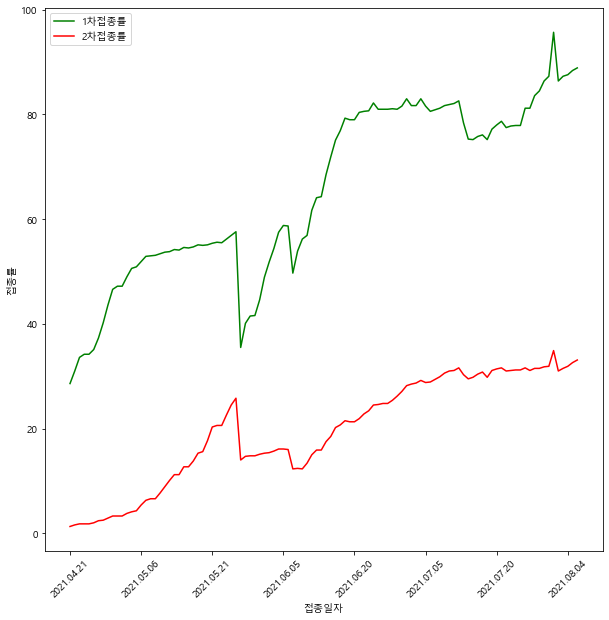

In [223]:
plt.figure(figsize=(10,10))
plt.plot(vaccine_df['접종일자'], vaccine_df['1차접종률'], color='green', label='1차접종률')
plt.plot(vaccine_df['접종일자'], vaccine_df['2차접종률'], color='red',label='2차접종률')

plt.xlabel('접종일자')
plt.ylabel('접종률')
plt.xticks([vaccine_df['접종일자'][15*i] for i in range(8)],rotation=45)

plt.legend(handles=(line1,line2),labels=('1차접종률','2차접종률'))
plt.legend(loc='best')

# 2. 소비내역 체크 (코로나이전, 코로나 발생이후 데이터)

### 백신접종 시작 이후 데이터는 따로 구해야함!

In [224]:
card_use = pd.read_excel('./Data/신한카드_코로나19_카드이용건수.xlsx')

In [235]:
card_use['이용일자']

0       20190101
1       20190101
2       20190101
3       20190101
4       20190101
          ...   
5533    20200630
5534    20200630
5535    20200630
5536    20200630
5537    20200630
Name: 이용일자, Length: 5538, dtype: int64

In [255]:
pre_corona = card_use[card_use['이용일자']<20200000]
pre_corona

,이용일자,업종대분류,카드결제건수(천건)
0,20190101,가전/가구,149
1,20190101,가정생활/서비스,189
2,20190101,교육/학원,142
3,20190101,미용,464
4,20190101,스포츠/문화/레저,1752
...,...,...,...
3167,20190901,음/식료품,1459
3168,20190901,의료,473
3169,20190901,자동차,267
3170,20190901,주유,1874


In [254]:
post_corona = card_use[card_use['이용일자']>20200000]
post_corona

,이용일자,업종대분류,카드결제건수(천건)
3172,20200101,가전/가구,158
3173,20200101,가정생활/서비스,197
3174,20200101,교육/학원,145
3175,20200101,미용,464
3176,20200101,스포츠/문화/레저,1969
...,...,...,...
5533,20200630,음/식료품,1549
5534,20200630,의료,2887
5535,20200630,자동차,418
5536,20200630,주유,2008
